## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  65.641947   399.972320  0.803883  9.459428  328.065358
1  15.740572   509.608575  0.886802  2.327297  452.425467
2  24.071662   262.624306  0.310512  8.020285   85.008580
3  20.868292  1451.466204  0.262492  9.891660  381.507232
4  70.836802   579.086832  0.571125  3.309094  338.445088


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9989259	total: 57.3ms	remaining: 57.3s
1:	learn: 0.9881738	total: 58.1ms	remaining: 29s
2:	learn: 0.9774167	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9673889	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9516846	total: 59.6ms	remaining: 11.9s
5:	learn: 0.9404920	total: 60ms	remaining: 9.94s
6:	learn: 0.9287655	total: 60.5ms	remaining: 8.59s
7:	learn: 0.9160852	total: 61.1ms	remaining: 7.57s
8:	learn: 0.9063704	total: 61.6ms	remaining: 6.78s
9:	learn: 0.8955734	total: 62.2ms	remaining: 6.15s
10:	learn: 0.8851203	total: 62.7ms	remaining: 5.63s
11:	learn: 0.8732139	total: 63.2ms	remaining: 5.2s
12:	learn: 0.8606396	total: 63.8ms	remaining: 4.84s
13:	learn: 0.8499854	total: 64.1ms	remaining: 4.52s
14:	learn: 0.8404332	total: 64.8ms	remaining: 4.25s
15:	learn: 0.8320127	total: 65.3ms	remaining: 4.01s
16:	learn: 0.8194147	total: 65.8ms	remaining: 3.8s
17:	learn: 0.8118663	total: 66.4ms	remaining: 3.62s
18:	learn: 0.8037109	total: 66.8ms	remaining: 3.45

24:	learn: 0.7437167	total: 69.4ms	remaining: 2.7s
25:	learn: 0.7317480	total: 69.8ms	remaining: 2.62s
26:	learn: 0.7243751	total: 70.3ms	remaining: 2.53s
27:	learn: 0.7149263	total: 70.7ms	remaining: 2.45s
28:	learn: 0.7044778	total: 71ms	remaining: 2.38s
29:	learn: 0.6956529	total: 71.6ms	remaining: 2.31s
30:	learn: 0.6892642	total: 72.3ms	remaining: 2.26s
31:	learn: 0.6801628	total: 72.8ms	remaining: 2.2s
32:	learn: 0.6728896	total: 73.4ms	remaining: 2.15s
33:	learn: 0.6653095	total: 73.8ms	remaining: 2.1s
34:	learn: 0.6571305	total: 74.3ms	remaining: 2.05s
35:	learn: 0.6481737	total: 74.7ms	remaining: 2s
36:	learn: 0.6393181	total: 75.1ms	remaining: 1.96s
37:	learn: 0.6319509	total: 75.7ms	remaining: 1.92s
38:	learn: 0.6253397	total: 76.1ms	remaining: 1.88s
39:	learn: 0.6181947	total: 76.5ms	remaining: 1.83s
40:	learn: 0.6103657	total: 77ms	remaining: 1.8s
41:	learn: 0.6032053	total: 77.4ms	remaining: 1.76s
42:	learn: 0.5959560	total: 77.9ms	remaining: 1.73s
43:	learn: 0.5897886	to

245:	learn: 0.0791230	total: 170ms	remaining: 520ms
246:	learn: 0.0784440	total: 170ms	remaining: 519ms
247:	learn: 0.0777648	total: 171ms	remaining: 518ms
248:	learn: 0.0771183	total: 171ms	remaining: 517ms
249:	learn: 0.0766951	total: 172ms	remaining: 515ms
250:	learn: 0.0761946	total: 172ms	remaining: 514ms
251:	learn: 0.0756115	total: 173ms	remaining: 512ms
252:	learn: 0.0751102	total: 173ms	remaining: 511ms
253:	learn: 0.0747172	total: 173ms	remaining: 509ms
254:	learn: 0.0741790	total: 174ms	remaining: 508ms
255:	learn: 0.0737137	total: 174ms	remaining: 506ms
256:	learn: 0.0731826	total: 175ms	remaining: 505ms
257:	learn: 0.0726080	total: 175ms	remaining: 503ms
258:	learn: 0.0721129	total: 175ms	remaining: 502ms
259:	learn: 0.0715285	total: 176ms	remaining: 500ms
260:	learn: 0.0710191	total: 176ms	remaining: 499ms
261:	learn: 0.0705805	total: 177ms	remaining: 499ms
262:	learn: 0.0700991	total: 178ms	remaining: 498ms
263:	learn: 0.0694549	total: 178ms	remaining: 496ms
264:	learn: 

347:	learn: 0.0450590	total: 220ms	remaining: 412ms
348:	learn: 0.0448608	total: 220ms	remaining: 411ms
349:	learn: 0.0446679	total: 221ms	remaining: 411ms
350:	learn: 0.0445301	total: 222ms	remaining: 410ms
351:	learn: 0.0443775	total: 222ms	remaining: 409ms
352:	learn: 0.0442262	total: 223ms	remaining: 408ms
353:	learn: 0.0440283	total: 223ms	remaining: 407ms
354:	learn: 0.0438467	total: 224ms	remaining: 407ms
355:	learn: 0.0436386	total: 224ms	remaining: 406ms
356:	learn: 0.0435204	total: 225ms	remaining: 405ms
357:	learn: 0.0433266	total: 225ms	remaining: 404ms
358:	learn: 0.0431055	total: 226ms	remaining: 403ms
359:	learn: 0.0429853	total: 226ms	remaining: 402ms
360:	learn: 0.0428723	total: 226ms	remaining: 401ms
361:	learn: 0.0426740	total: 227ms	remaining: 400ms
362:	learn: 0.0424885	total: 227ms	remaining: 399ms
363:	learn: 0.0422104	total: 228ms	remaining: 398ms
364:	learn: 0.0420958	total: 228ms	remaining: 397ms
365:	learn: 0.0418897	total: 229ms	remaining: 397ms
366:	learn: 

550:	learn: 0.0201890	total: 319ms	remaining: 260ms
551:	learn: 0.0201628	total: 320ms	remaining: 259ms
552:	learn: 0.0200738	total: 320ms	remaining: 259ms
553:	learn: 0.0200272	total: 321ms	remaining: 258ms
554:	learn: 0.0199589	total: 321ms	remaining: 257ms
555:	learn: 0.0199016	total: 322ms	remaining: 257ms
556:	learn: 0.0198346	total: 322ms	remaining: 256ms
557:	learn: 0.0198096	total: 323ms	remaining: 256ms
558:	learn: 0.0197849	total: 323ms	remaining: 255ms
559:	learn: 0.0197606	total: 324ms	remaining: 254ms
560:	learn: 0.0196951	total: 324ms	remaining: 254ms
561:	learn: 0.0196613	total: 325ms	remaining: 253ms
562:	learn: 0.0196377	total: 325ms	remaining: 253ms
563:	learn: 0.0195553	total: 326ms	remaining: 252ms
564:	learn: 0.0194951	total: 326ms	remaining: 251ms
565:	learn: 0.0194627	total: 327ms	remaining: 250ms
566:	learn: 0.0193862	total: 327ms	remaining: 250ms
567:	learn: 0.0193275	total: 328ms	remaining: 249ms
568:	learn: 0.0192961	total: 328ms	remaining: 248ms
569:	learn: 

667:	learn: 0.0142286	total: 383ms	remaining: 190ms
668:	learn: 0.0141850	total: 384ms	remaining: 190ms
669:	learn: 0.0141310	total: 384ms	remaining: 189ms
670:	learn: 0.0140890	total: 385ms	remaining: 189ms
671:	learn: 0.0140652	total: 385ms	remaining: 188ms
672:	learn: 0.0140267	total: 386ms	remaining: 188ms
673:	learn: 0.0139849	total: 387ms	remaining: 187ms
674:	learn: 0.0139314	total: 387ms	remaining: 186ms
675:	learn: 0.0138946	total: 388ms	remaining: 186ms
676:	learn: 0.0138576	total: 389ms	remaining: 185ms
677:	learn: 0.0138165	total: 389ms	remaining: 185ms
678:	learn: 0.0137618	total: 390ms	remaining: 184ms
679:	learn: 0.0137266	total: 390ms	remaining: 184ms
680:	learn: 0.0136732	total: 391ms	remaining: 183ms
681:	learn: 0.0136208	total: 392ms	remaining: 183ms
682:	learn: 0.0135829	total: 392ms	remaining: 182ms
683:	learn: 0.0135320	total: 393ms	remaining: 182ms
684:	learn: 0.0134824	total: 394ms	remaining: 181ms
685:	learn: 0.0134604	total: 394ms	remaining: 180ms
686:	learn: 

854:	learn: 0.0082372	total: 482ms	remaining: 81.8ms
855:	learn: 0.0082247	total: 483ms	remaining: 81.3ms
856:	learn: 0.0082075	total: 484ms	remaining: 80.8ms
857:	learn: 0.0081825	total: 485ms	remaining: 80.2ms
858:	learn: 0.0081597	total: 485ms	remaining: 79.6ms
859:	learn: 0.0081406	total: 486ms	remaining: 79.1ms
860:	learn: 0.0081153	total: 486ms	remaining: 78.5ms
861:	learn: 0.0081030	total: 487ms	remaining: 78ms
862:	learn: 0.0080842	total: 488ms	remaining: 77.5ms
863:	learn: 0.0080571	total: 488ms	remaining: 76.9ms
864:	learn: 0.0080372	total: 489ms	remaining: 76.3ms
865:	learn: 0.0080126	total: 490ms	remaining: 75.8ms
866:	learn: 0.0080005	total: 490ms	remaining: 75.2ms
867:	learn: 0.0079822	total: 491ms	remaining: 74.6ms
868:	learn: 0.0079577	total: 491ms	remaining: 74.1ms
869:	learn: 0.0079458	total: 492ms	remaining: 73.5ms
870:	learn: 0.0079279	total: 493ms	remaining: 73ms
871:	learn: 0.0079041	total: 493ms	remaining: 72.4ms
872:	learn: 0.0078639	total: 494ms	remaining: 71.9

913:	learn: 0.0071825	total: 516ms	remaining: 48.5ms
914:	learn: 0.0071735	total: 516ms	remaining: 48ms
915:	learn: 0.0071558	total: 517ms	remaining: 47.4ms
916:	learn: 0.0071355	total: 517ms	remaining: 46.8ms
917:	learn: 0.0071202	total: 518ms	remaining: 46.2ms
918:	learn: 0.0071114	total: 518ms	remaining: 45.7ms
919:	learn: 0.0070942	total: 519ms	remaining: 45.1ms
920:	learn: 0.0070745	total: 519ms	remaining: 44.5ms
921:	learn: 0.0070594	total: 520ms	remaining: 44ms
922:	learn: 0.0070507	total: 520ms	remaining: 43.4ms
923:	learn: 0.0070268	total: 521ms	remaining: 42.8ms
924:	learn: 0.0070075	total: 521ms	remaining: 42.3ms
925:	learn: 0.0069897	total: 522ms	remaining: 41.7ms
926:	learn: 0.0069812	total: 523ms	remaining: 41.1ms
927:	learn: 0.0069635	total: 523ms	remaining: 40.6ms
928:	learn: 0.0069552	total: 523ms	remaining: 40ms
929:	learn: 0.0069354	total: 524ms	remaining: 39.4ms
930:	learn: 0.0069189	total: 525ms	remaining: 38.9ms
931:	learn: 0.0069073	total: 525ms	remaining: 38.3ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

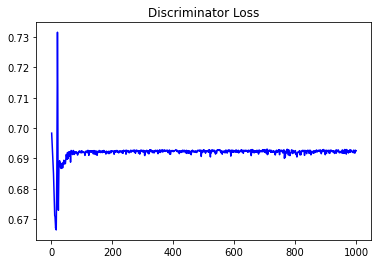

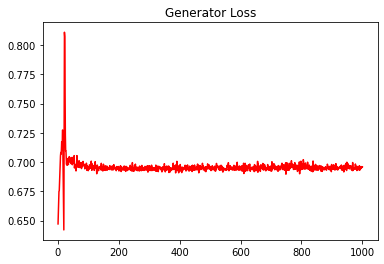

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.014042782896029352


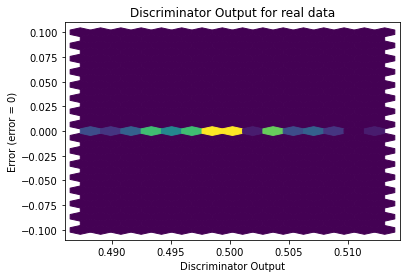

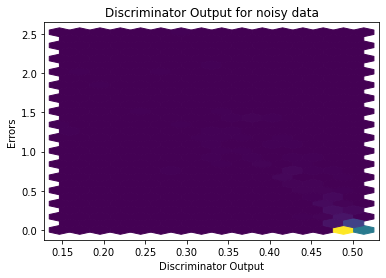

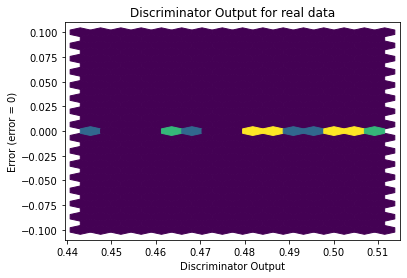

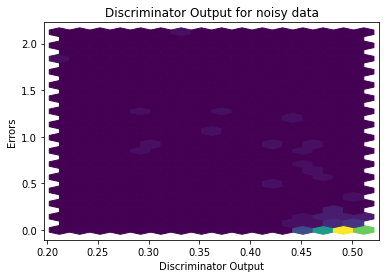

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


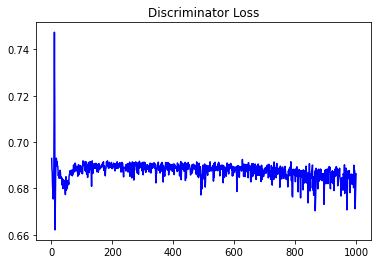

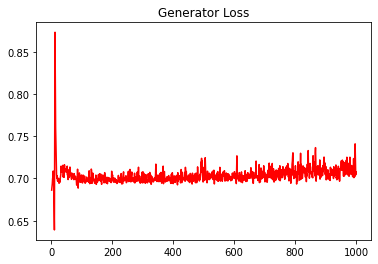

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.005878810601305569


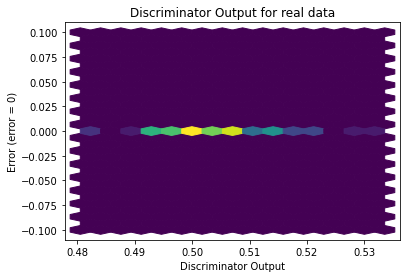

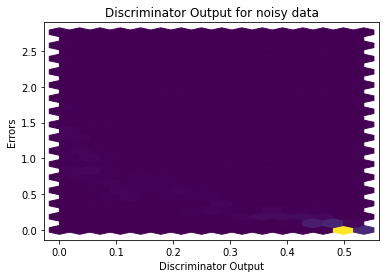

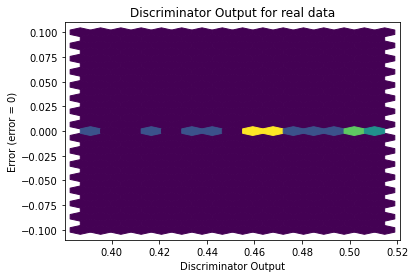

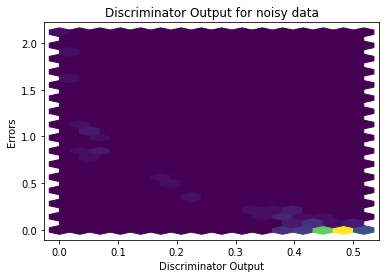

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3164]], requires_grad=True)
